In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw5.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science: 
## Homework 5: Multiclass Classification & Decision Trees

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

# 🎓 Predicting Student Outcomes 🕳️

In this assignment, you will construct and evaluate classification models to predict student outcomes (“Dropout,” “Enrolled,” or “Graduate”) using demographic, socio-economic, and academic data available at the point of enrollment. The aim is to identify students at risk and understand the factors contributing to their academic outcomes.

The dataset used in this assignment originates from the Polytechnic Institute of Portalegre, Portugal, and includes information such as demographics, socio-economic background, and academic history at the time of enrollment. The classification task involves predicting whether a student will graduate, remain enrolled, or drop out, which poses unique challenges, including class imbalance.

More information on the dataset and related modeling approaches can be found in the paper "Early Prediction of Student’s Performance in Higher Education: A Case Study" by Martins et al.. We have included a PDF of this paper in the data directory for your reference.

<div style = "background: orange; border: thin solid black; border-radius: 2px; padding: 5px">
<details>
<summary><strong>Dataset Information</strong> (click to expand)</summary>

| Variable Name                       | Description                                                                                                                                                                                                                             |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Marital Status                      | **1** – single, **2** – married, **3** – widower, **4** – divorced, **5** – facto union, **6** – legally separated                                                                                                                                              |
| Application mode                    | **1** - 1st phase - general contingent, **2** - Ordinance No. 612/93, **5** - 1st phase - special contingent (Azores Island), **7** - Holders of other higher courses, **10** - Ordinance No. 854-B/99, **15** - International student (bachelor), **16** - 1st phase - special contingent (Madeira Island), **17** - 2nd phase - general contingent, **18** - 3rd phase - general contingent, **26** - Ordinance No. 533-A/99, item b2) (Different Plan), **27** - Ordinance No. 533-A/99, item b3 (Other Institution), **39** - Over 23 years old, **42** - Transfer, **43** - Change of course, **44** - Technological specialization diploma holders, **51** - Change of institution/course, **53** - Short cycle diploma holders, **57** - Change of institution/course (International) |
| Application order                   | Application order (between **0** - first choice and **9** - last choice)                                                                                                                                                                        |
| Course                              | **33** - Biofuel Production Technologies, **171** - Animation and Multimedia Design, **8014** - Social Service (evening attendance), **9003** - Agronomy, **9070** - Communication Design, **9085** - Veterinary Nursing, **9119** - Informatics Engineering, **9130** - Equinculture, **9147** - Management, **9238** - Social Service, **9254** - Tourism, **9500** - Nursing, **9556** - Oral Hygiene, **9670** - Advertising and Marketing Management, **9773** - Journalism and Communication, **9853** - Basic Education, **9991** - Management (evening attendance) |
| Daytime/evening attendance          | **1** – daytime, **0** - evening                                                                                                                                                                                                                |
| Previous qualification              | **1** - Secondary education, **2** - Higher education - bachelor's degree, **3** - Higher education - degree, **4** - Higher education - master's, **5** - Higher education - doctorate, **6** - Frequency of higher education, **9** - 12th year of schooling - not completed, **10** - 11th year of schooling - not completed, **12** - Other - 11th year of schooling, **14** - 10th year of schooling, **15** - 10th year of schooling - not completed, **19** - Basic education 3rd cycle (9th/10th/11th year) or equiv., **38** - Basic education 2nd cycle (6th/7th/8th year) or equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **42** - Professional higher technical course, **43** - Higher education - master (2nd cycle) |
| Previous qualification (grade)      | Grade of previous qualification (between **0** and **200**)                                                                                                                                                                                      |
| Nationality                         | **1** - Portuguese, **2** - German, **6** - Spanish, **11** - Italian, **13** - Dutch, **14** - English, **17** - Lithuanian, **21** - Angolan, **22** - Cape Verdean, **24** - Guinean, **25** - Mozambican, **26** - Santomean, **32** - Turkish, **41** - Brazilian, **62** - Romanian, **100** - Moldova (Republic of), **101** - Mexican, **103** - Ukrainian, **105** - Russian, **108** - Cuban, **109** - Colombian |
| Mother's qualification              | **1** - Secondary Education - 12th Year of Schooling or Eq., **2** - Higher Education - Bachelor's Degree, **3** - Higher Education - Degree, **4** - Higher Education - Master's, **5** - Higher Education - Doctorate, **6** - Frequency of Higher Education, **9** - 12th Year of Schooling - Not Completed, **10** - 11th Year of Schooling - Not Completed, **11** - 7th Year (Old), **12** - Other - 11th Year of Schooling, **14** - 10th Year of Schooling, **18** - General commerce course, **19** - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv., **22** - Technical-professional course, **26** - 7th year of schooling, **27** - 2nd cycle of the general high school course, **29** - 9th Year of Schooling - Not Completed, **30** - 8th year of schooling, **34** - Unknown, **35** - Can't read or write, **36** - Can read without having a 4th year of schooling, **37** - Basic education 1st cycle (4th/5th year) or equiv., **38** - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **41** - Specialized higher studies course, **42** - Professional higher technical course, **43** - Higher Education - Master (2nd cycle), **44** - Higher Education - Doctorate (3rd cycle) |
| Father's qualification              | Similar values as Mother's qualification (refer to full details above)                                                                                                                                                                   |
| Mother's occupation                 | **0** - Student, **1** - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers, **2** - Specialists in Intellectual and Scientific Activities, **3** - Intermediate Level Technicians and Professions, **4** - Administrative staff, **5** - Personal Services, Security and Safety Workers and Sellers, **6** - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry, **7** - Skilled Workers in Industry, Construction and Craftsmen, **8** - Installation and Machine Operators and Assembly Workers, **9** - Unskilled Workers, **10** - Armed Forces Professions, **90** - Other Situation, **99** - (blank), **122** - Health professionals, **123** - teachers, **125** - Specialists in information and communication technologies (ICT), **131** - Intermediate level science and engineering technicians and professions, **132** - Technicians and professionals, of intermediate level of health, **134** - Intermediate level technicians from legal, social, sports, cultural and similar services, **141** - Office workers, secretaries in general and data processing operators, **143** - Data, accounting, statistical, financial services and registry-related operators, **144** - Other administrative support staff, **151** - personal service workers, **152** - sellers, **153** - Personal care workers and the like, **171** - Skilled construction workers and the like, except electricians, **173** - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like, **175** - Workers in food processing, woodworking, clothing and other industries and crafts, **191** - cleaning workers, **192** - Unskilled workers in agriculture, animal production, fisheries and forestry, **193** - Unskilled workers in extractive industry, construction, manufacturing and transport, **194** - Meal preparation assistants |
| Father's occupation                 | Similar values as Mother's occupation (refer to full details above)                                                                                                                                                                     |
| Admission grade                     | Admission grade (between **0** and **200**)                                                                                                                                                                                                     |
| Displaced                           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Educational special needs           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Debtor                              | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Tuition fees up to date             | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Gender                              | **1** – male, **0** – female                                                                                                                                                                                                                     |
| Scholarship holder                  | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Age at enrollment                   | Age of student at enrollment                                                                                                                                                                                                            |
| International                       | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Curricular units 1st sem (credited) | Number of curricular units credited in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (enrolled) | Number of curricular units enrolled in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (evaluations) | Number of evaluations to curricular units in the 1st semester                                                                                                                                                                            |
| Curricular units 1st sem (approved) | Number of curricular units approved in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (grade)    | Grade average in the 1st semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 1st sem (without evaluations) | Number of curricular units without evaluations in the 1st semester                                                                                                                                                                       |
| Curricular units 2nd sem (credited) | Number of curricular units credited in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (enrolled) | Number of curricular units enrolled in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (evaluations) | Number of evaluations to curricular units in the 2nd semester                                                                                                                                                                            |
| Curricular units 2nd sem (approved) | Number of curricular units approved in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (grade)    | Grade average in the 2nd semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 2nd sem (without evaluations) | Number of curricular units without evaluations in the 2nd semester                                                                                                                                                                       |
| Unemployment rate                   | Unemployment rate (%)                                                                                                                                                                                                                    |
| Inflation rate                      | Inflation rate (%)                                                                                                                                                                                                                       |
| GDP                                 | GDP                                                                                                                                                                                                                                      |
| Target                              | The problem is formulated as a three-category classification task: **dropout**, **enrolled**, or **graduate** at the end of the normal duration of the course                                                                                                                              |

</details>
</div>

<p>
<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Guidelines</strong>
</span>
</p>

This assignment is intentionally **open-ended**. You will not receive explicit instructions for every step—it is up to you to **make informed decisions** and **justify** them.

Consider every choice carefully, and support your decisions with **evidence** such as plots, metrics, or references to the literature.

The goal is to apply your data science expertise to a real-world problem where there may not be a single correct answer but rather multiple valid approaches that can be logically defended.

Feel free to add code and markdown cells as you need them. 

<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>HW5 Overview</strong>
</span>

- EDA & General Preprocessing
- Model 1: OvR Logistic Regression
- Model 2: Decicion Tree Classifier
- Model 3: Custom Classifier
- Model Comparison & Kaggle Submissions
- Causal Inference (BONUS)
- Wrap-up

🏆 **Each of the 3 models has an associated Kaggle competition. Making it into the top 20 on any of the leaderboards will earn you bonus points.**

<span style = "background: violet; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Submission Requirements</strong>
</span>

- The notebook submitted to Canvas must **run from top to bottom** without errors and contain **all output**.
- Notebooks are intended for human readers. Prose should appear in markdown cells, not code comments.
- Notebooks should contain no excessive output and no non-functional code unless the latter is included with the expressive purpose of communicating something to the reader. 
- Predictions must be saved in the specified paths when the notebook is run to facilitate staff verification.
- Kaggle submissions whose performance cannot be reproduced by the appropriate model in the related notebook submission will be disqualified.

<p>
<span style = "background: red; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>☣️ HW Submissions Copy-Pasted from Generative AI Output Will Receive No Credit ☣️</strong>
</span>
</p>



In [3]:
import os
import seaborn as sns # additional import for confusion matrix
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, \
                        GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
                            roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE # use SMOTE for handling class imbalance

# For optional causal inference section
# from psmpy import PsmPy
# from psmpy.functions import cohenD
# from psmpy.plotting import *

In [4]:
# For calculating total notebook runtime
notebook_start = time.time()

## EDA & General Preprocessing

Load and explore the dataset. Your EDA should help inform your later modeling decisions. 

**Hints:**

- Consider methods to handle class imbalance, feature scaling, categorical variable encoding, and any necessary feature engineering. Provide justification for the choice you make, including reasons for *not* taking certain actions that might be considered standard in the given context.
- You may decide that your different models require their own distinct preprocessing steps rather than taking a one-size-fits-all approach.
- Take a moment to look at the imports provided above. You may find these useful through the notebook.

---

In [5]:
# Load the data
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv")
X_test = pd.read_csv("data/X_test.csv")

# Check class imbalance
display(y_train.Target.value_counts())

# Handle class imbalance here (before preprocessing)
smote = SMOTE(random_state=27)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
display(y_train_sm.Target.value_counts())

# Inspect the data
X_train.head()

Target
Graduate    1657
Dropout     1066
Enrolled     595
Name: count, dtype: int64

Target
Graduate    1657
Dropout     1657
Enrolled    1657
Name: count, dtype: int64

Marital status  Application mode  Application order  Course  \
0               1                 1                  6    9773   
1               1                17                  2    9147   
2               1                17                  3    9670   
3               1                39                  1    9500   
4               2                 7                  1    9254   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      19   
4                           1                       2   

   Previous qualification (grade)  Nationality  Mother's qualification  \
0                           125.0            1                       1   
1                           122.0            1                      19   
2                           123.0            1                      38   
3                           133.1            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  \
0                       1  ...   
1                      19  ...   
2                      38  ...   
3                      38  ...   
4                      37  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    6   
1                                    0                                    5   
2                                    0                                    6   
3                                    0                                    7   
4                                    0                                    5   

   Curricular units 2nd sem (evaluations)  \
0                                       8   
1                                       5   
2                                      11   
3                                      10   
4                                      10   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    5                         12.666667   
1                                    3                         11.000000   
2                                    5                         12.333333   
3                                    1                         10.000000   
4                                    0                          0.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               15.5   
1                                               0               12.4   
2                                               0               11.1   
3                                               0               13.9   
4                                               0               10.8   

   Inflation rate   GDP  
0             2.8 -4.06  
1             0.5  1.79  
2             0.6  2.02  
3            -0.3  0.79  
4             1.4  1.74  

[5 rows x 36 columns]

In [6]:
# Quick glance at the other datasets 
display(y_train_sm[:2])
display(X_test[:2])

# Better understanding of X_test
display(X_train_sm.dtypes)

# Identify all the missing data
display(X_train_sm.isna().sum(axis=0)) # Confirmed there is no missing data

Target
0  Graduate
1  Graduate

Marital status  Application mode  Application order  Course  \
0               1                 1                  2    9070   
1               1                17                  3    9147   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   

   Previous qualification (grade)  Nationality  Mother's qualification  \
0                           164.0            1                      38   
1                           120.0            1                      19   

   Father's qualification  ...  \
0                      38  ...   
1                      19  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    6   
1                                    0                                    5   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                      11   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         14.857143   
1                                    3                         10.857143   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0                9.4   
1                                               0               10.8   

   Inflation rate   GDP  
0            -0.8 -3.12  
1             1.4  1.74  

[2 rows x 36 columns]

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

array([2, 2, 2, ..., 1, 1, 1])

X_train_sm has 36 columns


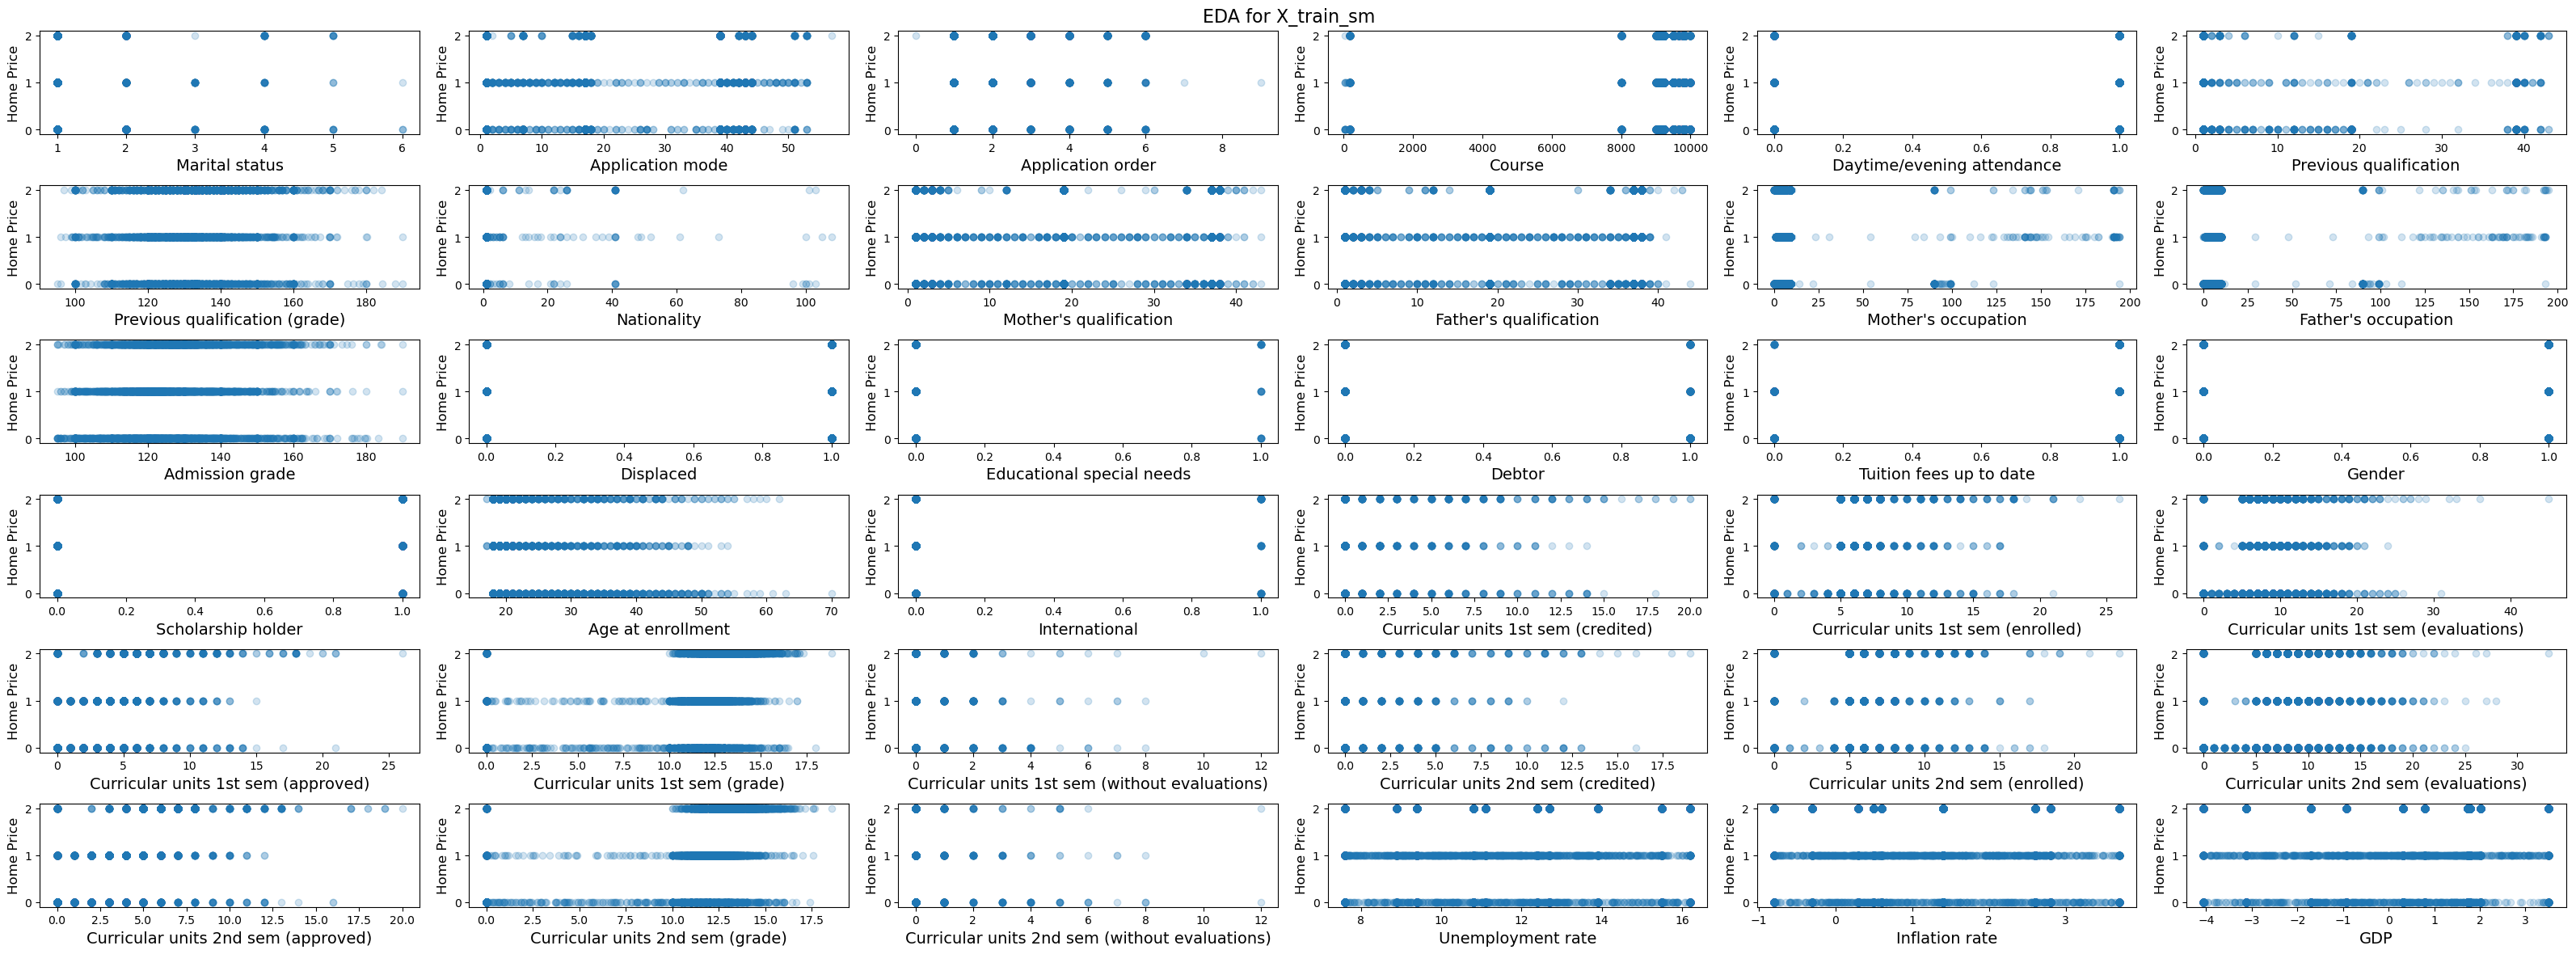

In [7]:
# Pre-preprocessing and EDA
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_sm['Target']) # Useful for visualizations and OvR
display(y_train_encoded) # 2 = Graduate, 1 = Enrolled, 0 = Dropout


print(f"X_train_sm has {X_train_sm.shape[1]} columns")

# EDA
nrow = 6; ncol = 6
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(32, 12))

fig.suptitle('EDA for X_train_sm', fontsize=16)

for ax, column in zip(axs.reshape(-1), X_train_sm.columns):
    ax.scatter(X_train_sm[column], y_train_encoded, alpha=0.2)
    ax.set_xlabel(f'{column}', fontsize=14)
    ax.set_ylabel('Home Price', fontsize=12)
plt.tight_layout()

In [8]:
### --- Initial Preprocessing --- ###

# --- Update_2: Remove the intuitively less relevant columns (apply Occam's Razor) --- #
# irrelevant_cols = ["Daytime/evening attendance",
#                    "Nationality", 
#                    "Marital status"]
# X_train_pruned = X_train_sm.drop(columns=irrelevant_cols)
# X_test_pruned = X_test.drop(columns=irrelevant_cols)

### --- Original Approach --- ###
# --- Update_3: Decided to go with this approach --- #
col_names = X_train_sm.columns.tolist() # All column names
categorical_cols = ["Marital status", 
                    "Application mode", 
                    "Application order", 
                    "Course", 
                    "Previous qualification", 
                    "Nationality", 
                    "Mother's qualification", 
                    "Father's qualification", 
                    "Mother's occupation", 
                    "Father's occupation"] # All categorical, non-binary columns

binary_cols = [col for col in col_names if 
               set(X_train_sm[col].unique()).issubset({0, 1})] # All binary columns

non_quant_cols = categorical_cols + binary_cols
quant_cols = [col for col in col_names if 
              col not in non_quant_cols] # All quantitative cols; motivation for StandardScaler()

# Break up the categorical data
X_train_encoded = pd.get_dummies(X_train_sm, columns=categorical_cols)
train_columns = X_train_encoded.columns

X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)
# X_test_encoded = X_test_encoded.reindex(columns=train_columns, fill_value=0) -> After discussion, this shit was fucking me

# --- UPDATE_1: Truncate the X_train columns instead of increasing X_test
# Find common columns
common_cols = X_train_encoded.columns.intersection(X_test_encoded.columns)

# Drop non-common columns from X_train_encoded
cols_to_drop_train = X_train_encoded.columns.difference(common_cols)
X_train_encoded.drop(columns=cols_to_drop_train, inplace=True)

# Drop non-common columns from X_test_encoded
cols_to_drop_test = X_test_encoded.columns.difference(common_cols)
X_test_encoded.drop(columns=cols_to_drop_test, inplace=True)

### --- Removing irrelevant columns approach --- ###
# col_names = X_train_pruned.columns.tolist()
# categorical_cols = ["Application mode",
#                     "Application order",
#                     "Course", 
#                     "Previous qualification", 
#                     "Mother's qualification", 
#                     "Father's qualification", 
#                     "Mother's occupation", 
#                     "Father's occupation"] # New categorical cols, non-binary columns

# binary_cols = [col for col in X_train_pruned.columns if 
#                set(X_train_pruned[col].unique()).issubset({0, 1})] # All binary columns

# non_quant_cols = categorical_cols + binary_cols
# quant_cols = [col for col in col_names if 
#               col not in non_quant_cols] # All quantitative cols; motivation for StandardScaler()

# # Same approach
# X_train_encoded = pd.get_dummies(X_train_pruned, columns=categorical_cols)
# train_columns = X_train_encoded.columns

# X_test_encoded = pd.get_dummies(X_test_pruned, columns=categorical_cols)
# # X_test_encoded = X_test_encoded.reindex(columns=train_columns, fill_value=0) -> After discussion, this shit was fucking me

# Truncate the X_train columns instead of increasing X_test
# # Find common columns
# common_cols = X_train_encoded.columns.intersection(X_test_encoded.columns)

# # Drop non-common columns from X_train_encoded
# cols_to_drop_train = X_train_encoded.columns.difference(common_cols)
# X_train_encoded.drop(columns=cols_to_drop_train, inplace=True)

# # Drop non-common columns from X_test_encoded
# cols_to_drop_test = X_test_encoded.columns.difference(common_cols)
# X_test_encoded.drop(columns=cols_to_drop_test, inplace=True)



# Get a sense of how many columns are left
X_test_encoded.shape[1]

192

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Model 1: OvR Logistic Regression

Develop a One-vs-Rest Logistic Regression model to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train an **OvR Logistic Regression** model using appropriate hyperparameter tuning methods (e.g., cross-validation).
   - Explain and justify all modeling decisions, including any feature preprocessing, engineering, and/or selection, hyperparameter tuning, and regularization choices.

2. **Prediction Generation**
   - Generate predictions for the test dataset in `./data/X_test.csv`.
   - Save your predictions in the following file path: `./submissions/submission_logreg.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_logreg.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance in your logistic regression model.
   - Provide visualizations and explanations to support your interpretations (e.g., coefficients of significant predictors).

**Kaggle Competition Link**: [Logistic Regression Kaggle Competition](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)

**Kaggle Rules Summary**:
- You **must use an OvR Logistic Regression model**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

In [9]:
### --- Basic Model --- ###
lr1 = LogisticRegressionCV(n_jobs=-1,
                         cv=10,
                         random_state=27,
                         scoring='f1_micro')
ovr1 = OneVsRestClassifier(lr1).fit(X_train_encoded, y_train_encoded)
y_train_pred1 = ovr1.predict(X_train_encoded)


/Users/main/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/main/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

F1 score: 0.8107020720177027


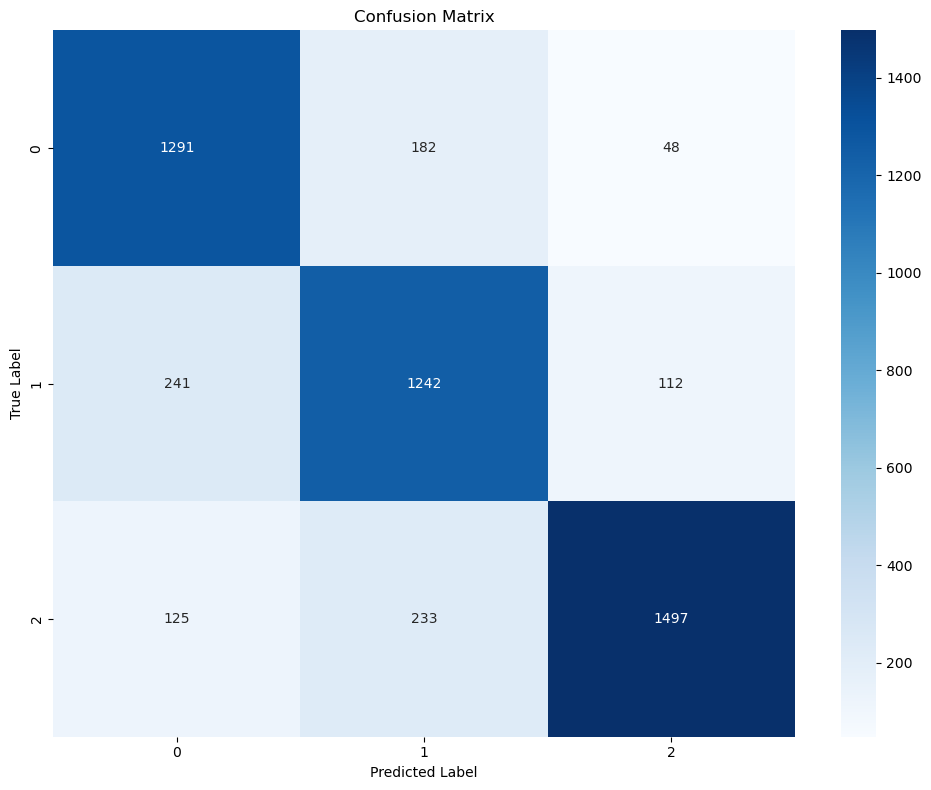

In [10]:
# Scoring metric of Kaggle
print(f"F1 score: {f1_score(y_train_encoded, y_train_pred1, average='micro')}") # Base model was not too bad

# --- Confusion Matrix: Better understand the errors --- #
cm = confusion_matrix(y_train_pred1, y_train_encoded)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [11]:
### --- Include Standardization--- ###
s = StandardScaler()

# Fit and transform the data
X_train_encoded[quant_cols] = s.fit_transform(X_train_encoded[quant_cols])
X_test_encoded[quant_cols] = s.transform(X_test_encoded[quant_cols])

# Fit model & predict
lr2 = LogisticRegressionCV(n_jobs=-1,
                         cv=10,
                         random_state=27,
                         scoring='f1_micro')
ovr2 = OneVsRestClassifier(lr2).fit(X_train_encoded, 
                                    y_train_encoded)
y_train_pred2 = ovr2.predict(X_train_encoded)



/Users/main/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/main/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

F1 score: 0.8123114061557031


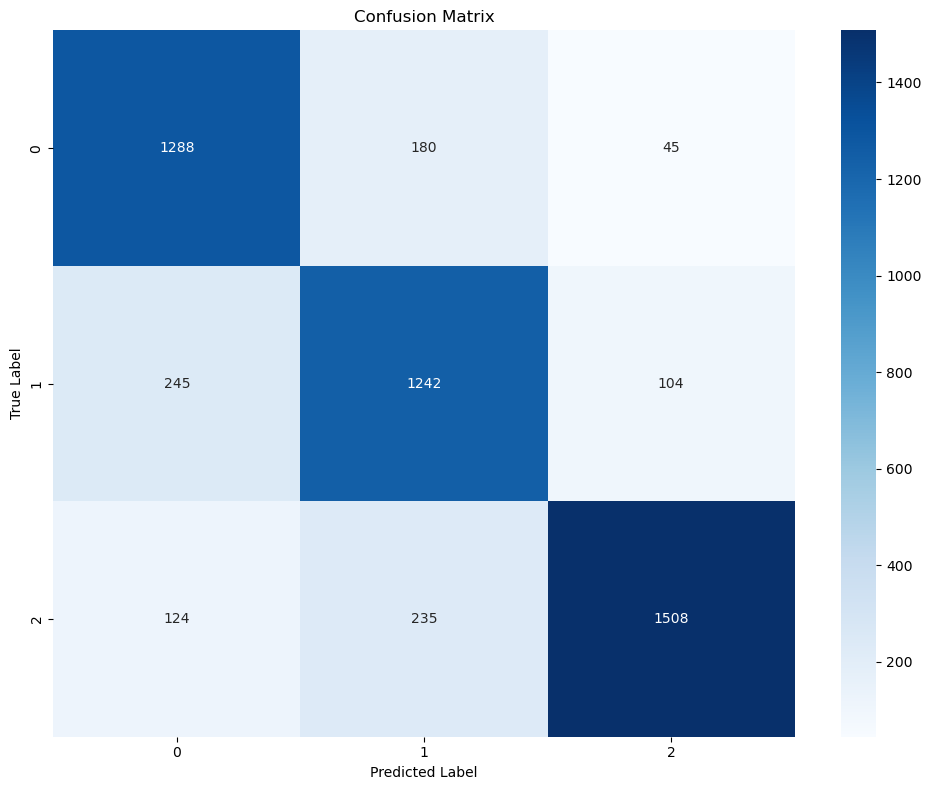

In [12]:
# Print score
print(f"F1 score: {f1_score(y_train_encoded, y_train_pred2, average='micro')}")

# --- Confusion Matrix --- #
cm = confusion_matrix(y_train_pred2, y_train_encoded)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [13]:
### --- Include KFoldObject --- ###
kf = KFold(n_splits=10, 
           shuffle=True,
           random_state=27)

lr3 = LogisticRegressionCV(n_jobs=-1,
                         cv=kf,
                         random_state=27,
                         scoring='f1_micro')
ovr3 = OneVsRestClassifier(lr3).fit(X_train_encoded, 
                                    y_train_encoded)
y_train_pred3 = ovr3.predict(X_train_encoded)


/Users/main/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/main/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

F1 score: 0.8125125729229531


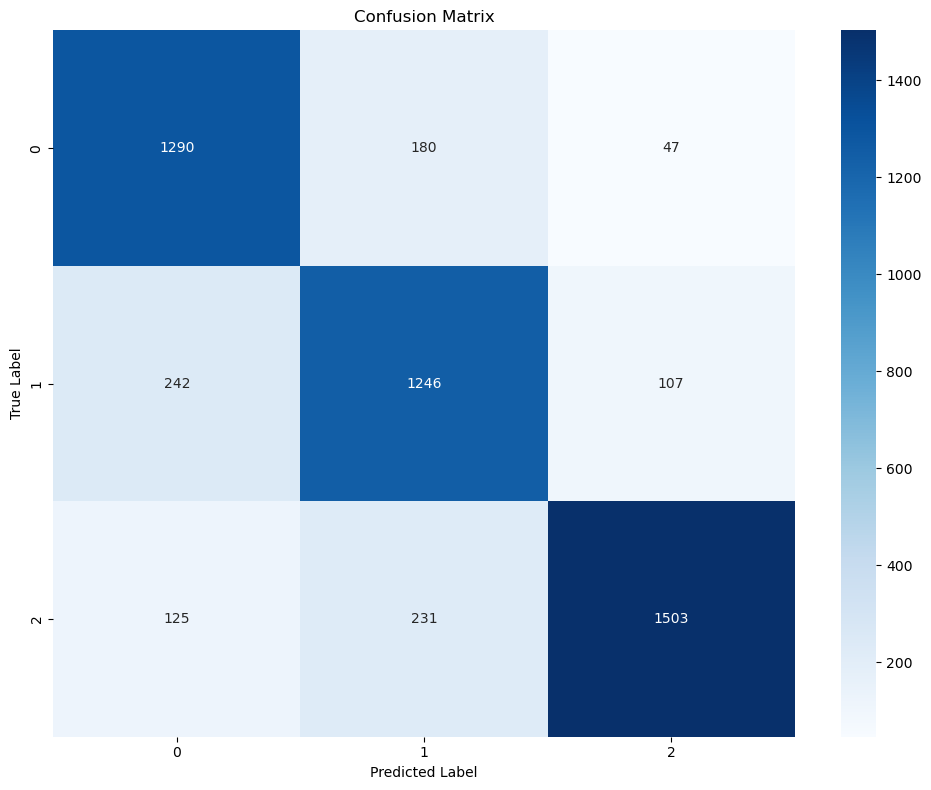

In [14]:
# Print score
print(f"F1 score: {f1_score(y_train_encoded, y_train_pred3, average='micro')}")

# --- Confusion Matrix --- #
cm = confusion_matrix(y_train_pred3, y_train_encoded)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [15]:
### --- Experiment with class_weight = 'balanced' --- ###
lr4 = LogisticRegressionCV(n_jobs=-1,
                         cv=kf,
                         random_state=27,
                         class_weight='balanced',
                         refit=True,
                         scoring='f1_micro')
ovr4 = OneVsRestClassifier(lr4).fit(X_train_encoded, 
                                    y_train_encoded)
y_train_pred4 = ovr4.predict(X_train_encoded)


/Users/main/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/main/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

F1 score: 0.8096962381814524


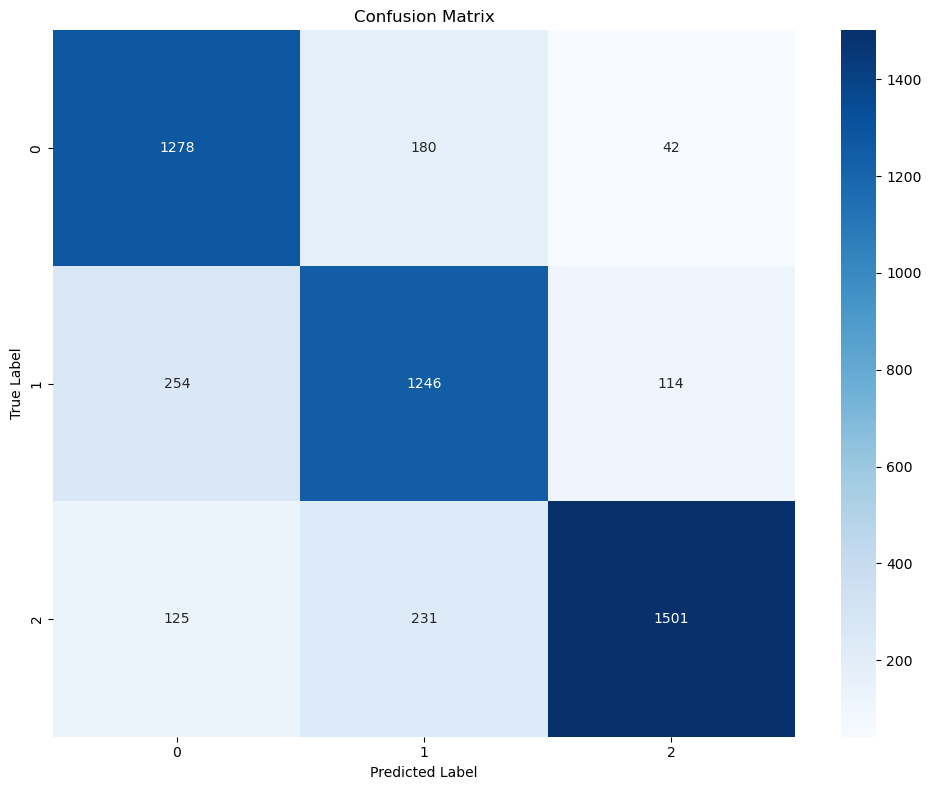

In [16]:
# Print score
print(f"F1 score: {f1_score(y_train_encoded, y_train_pred4, average='micro')}")

# --- Confusion Matrix --- #
cm = confusion_matrix(y_train_pred4, y_train_encoded)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [17]:
### --- Include Lasso Regularization, going through different regularization params --- ###
Cs = np.logspace(-3,3,25) # Regularization Parameters

lr5 = LogisticRegressionCV(penalty = 'l1',
                         solver = 'liblinear',
                         n_jobs=-1,
                         verbose=1,
                         cv=kf,
                         Cs=Cs,
                         random_state=27,
                         refit=True,
                         scoring='f1_micro')

ovr5 = OneVsRestClassifier(lr5, 
                            n_jobs=-1).fit(X_train_encoded, 
                                           y_train_encoded)

# Print the Accuracy
y_train_pred5 = ovr5.predict(X_train_encoded)


iter   1  #CD cycles 1
iter   2  #CD cycles 1
optimization finished, #iter = 2
Objective value = 3.083153
#nonzeros/#features = 1/193
iter   1  #CD cycles 1
iter   2  #CD cycles 2
iter   3  #CD cycles 1
optimization finished, #iter = 3
Objective value = 3.084843
#nonzeros/#features = 1/193
iter   1  #CD cycles 1
iter   2  #CD cycles 1
optimization finished, #iter = 2
Objective value = 3.085550
#nonzeros/#features = 1/193
iter   1  #CD cycles 1
iter   2  #CD cycles 1
optimization finished, #iter = 2
Objective value = 3.084243
#nonzeros/#features = 1/193
iter   1  #CD cycles 1
iter   2  #CD cycles 1
optimization finished, #iter = 2
Objective value = 3.084768
#nonzeros/#features = 1/193
iter   1  #CD cycles 1
iter   2  #CD cycles 3
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 1
iter   6  #CD cycles 4
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   7  #CD cycles 1
optimization finished, #iter = 2
Objective value = 3.084296
#nonzeros/#features = 1/193
iter   8  #C

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


optimization finished, #iter = 0
Objective value = 3.101140
#nonzeros/#features = 0/193
optimization finished, #iter = 0
Objective value = 3.101140
#nonzeros/#features = 0/193
iter   1  #CD cycles 1
iter   2  #CD cycles 1
optimization finished, #iter = 0
Objective value = 3.101140
#nonzeros/#features = 0/193
optimization finished, #iter = 2
Objective value = 3.084667
#nonzeros/#features = 1/193
optimization finished, #iter = 0
Objective value = 3.101140
#nonzeros/#features = 0/193
optimization finished, #iter = 0
Objective value = 3.100447
#nonzeros/#features = 0/193
optimization finished, #iter = 0
Objective value = 3.101140
#nonzeros/#features = 0/193
iter   1  #CD cycles 1
iter   1  #CD cycles 1
iter   2  #CD cycles 3
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 1
iter   5  #CD cycles 1
iter   6  #CD cycles 1
iter   6  #CD cycles 4
iter   7  #CD cycles 1
iter   7  #CD cycles 1
iter   8  #CD cy

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   38.7s remaining:   25.8s


iter  24  #CD cycles 46
iter  11  #CD cycles 119
iter  12  #CD cycles 5
iter  13  #CD cycles 9
iter  14  #CD cycles 3
iter  15  #CD cycles 1
iter  25  #CD cycles 85
iter  26  #CD cycles 31
iter  27  #CD cycles 18
iter  51  #CD cycles 1000
iter  15  #CD cycles 237
optimization finished, #iter = 51
Objective value = 58848.445865
#nonzeros/#features = 189/193
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 2
iter   4  #CD cycles 1
iter   5  #CD cycles 8
iter  16  #CD cycles 13
iter  17  #CD cycles 5
iter  18  #CD cycles 7
iter  19  #CD cycles 2
iter   6  #CD cycles 1
iter  28  #CD cycles 53
iter  20  #CD cycles 2
iter  21  #CD cycles 1
iter  29  #CD cycles 6
iter   7  #CD cycles 20
iter   8  #CD cycles 2
iter   9  #CD cycles 2
iter  10  #CD cycles 1
iter  30  #CD cycles 47
iter  23  #CD cycles 1000
iter  31  #CD cycles 8
iter  32  #CD cycles 13
iter  20  #CD cycles 1000
iter  33  #CD cycles 15
iter  19  #CD cycles 836
iter  34  #CD cycles 14
iter  34  #CD cycles 1000
op

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.0min finished


iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 3
iter   4  #CD cycles 1
iter   5  #CD cycles 4
iter   6  #CD cycles 1
iter   7  #CD cycles 15
iter   8  #CD cycles 1
iter  52  #CD cycles 1000
iter  26  #CD cycles 52
iter  14  #CD cycles 121
iter  27  #CD cycles 14
iter  28  #CD cycles 3
iter  41  #CD cycles 72
iter  42  #CD cycles 7
iter   9  #CD cycles 26
iter  10  #CD cycles 1
iter  43  #CD cycles 20
iter  29  #CD cycles 5
iter  30  #CD cycles 3
iter  11  #CD cycles 198
iter  31  #CD cycles 20
iter  12  #CD cycles 4
iter  13  #CD cycles 1
iter  11  #CD cycles 45
iter  12  #CD cycles 1
iter  32  #CD cycles 19
iter  33  #CD cycles 4
iter  34  #CD cycles 1
iter  15  #CD cycles 37
iter  16  #CD cycles 2
iter  17  #CD cycles 4
iter  44  #CD cycles 56
iter  18  #CD cycles 13
iter  19  #CD cycles 1
iter  26  #CD cycles 1000
iter  45  #CD cycles 48
iter  46  #CD cycles 15
iter  46  #CD cycles 1000
optimization finished, #iter = 46
Objective value = 1834295.933476
#nonzeros

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.1min remaining:   43.1s


iter  18  #CD cycles 62
iter  21  #CD cycles 49
iter  19  #CD cycles 3
iter  20  #CD cycles 7
iter  21  #CD cycles 6
iter  28  #CD cycles 1000
iter  22  #CD cycles 26
iter  23  #CD cycles 20
iter  24  #CD cycles 1
iter  29  #CD cycles 62
iter  22  #CD cycles 97
iter  23  #CD cycles 2
iter  24  #CD cycles 4
iter  25  #CD cycles 14
iter  26  #CD cycles 7
iter  27  #CD cycles 7
iter  28  #CD cycles 6
iter  29  #CD cycles 6
iter  50  #CD cycles 1000
iter  30  #CD cycles 13
iter  31  #CD cycles 3
iter  32  #CD cycles 1
iter  49  #CD cycles 1000
iter  30  #CD cycles 100
iter  31  #CD cycles 58
iter  32  #CD cycles 25
iter  33  #CD cycles 16
iter  23  #CD cycles 711
iter  34  #CD cycles 30
iter  35  #CD cycles 3
iter  36  #CD cycles 5
iter  15  #CD cycles 781
iter  24  #CD cycles 12
iter  37  #CD cycles 39
iter  25  #CD cycles 45
iter  38  #CD cycles 12
iter  26  #CD cycles 13
iter  27  #CD cycles 11
iter  39  #CD cycles 60
iter  40  #CD cycles 8
iter  28  #CD cycles 46
iter  30  #CD cycles 8

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.3min remaining:   51.6s


iter  15  #CD cycles 66
iter  16  #CD cycles 15
iter  17  #CD cycles 6
iter  18  #CD cycles 6
iter  19  #CD cycles 6
iter  20  #CD cycles 6
iter  21  #CD cycles 1
iter  13  #CD cycles 205
iter  14  #CD cycles 51
iter  14  #CD cycles 269
iter  50  #CD cycles 1000
iter  15  #CD cycles 45
iter  16  #CD cycles 12
iter  17  #CD cycles 3
iter  18  #CD cycles 8
iter  15  #CD cycles 70
iter  19  #CD cycles 4
iter  20  #CD cycles 3
iter  29  #CD cycles 552
iter  16  #CD cycles 9
iter  21  #CD cycles 5
iter  22  #CD cycles 1
iter  17  #CD cycles 4
iter  18  #CD cycles 2
iter  19  #CD cycles 1
iter  30  #CD cycles 25
iter  31  #CD cycles 24
iter  32  #CD cycles 26
iter  33  #CD cycles 1
iter  22  #CD cycles 567
iter  23  #CD cycles 423
iter  24  #CD cycles 69
iter  25  #CD cycles 47
iter  26  #CD cycles 3
iter  27  #CD cycles 15
iter  28  #CD cycles 3
iter  29  #CD cycles 5
iter  30  #CD cycles 3
iter  31  #CD cycles 8
iter  32  #CD cycles 6
iter  33  #CD cycles 7
iter  34  #CD cycles 2
iter  35 

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.4min finished


iter  15  #CD cycles 262
iter  16  #CD cycles 253
iter  17  #CD cycles 3
iter  18  #CD cycles 1
iter  37  #CD cycles 1000
iter  19  #CD cycles 1000
iter  38  #CD cycles 1000
optimization finished, #iter = 38
Objective value = 10432.091752
#nonzeros/#features = 167/193
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 2
iter   4  #CD cycles 1
iter   5  #CD cycles 10
iter   6  #CD cycles 6
iter   7  #CD cycles 1
iter   8  #CD cycles 33
iter   9  #CD cycles 15
iter  10  #CD cycles 1
iter  11  #CD cycles 126
iter  12  #CD cycles 45
iter  13  #CD cycles 1
iter  14  #CD cycles 672
iter  20  #CD cycles 1000
iter  21  #CD cycles 102
iter  22  #CD cycles 97
iter  23  #CD cycles 25
iter  24  #CD cycles 9
iter  15  #CD cycles 278
iter  16  #CD cycles 2
iter  17  #CD cycles 2
iter  25  #CD cycles 51
iter  18  #CD cycles 25
iter  19  #CD cycles 11
iter  20  #CD cycles 2
iter  21  #CD cycles 2
iter  22  #CD cycles 3
iter  23  #CD cycles 1
iter  26  #CD cycles 51
iter  27  #CD cycles

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished


F1 score: 0.8094950714142024


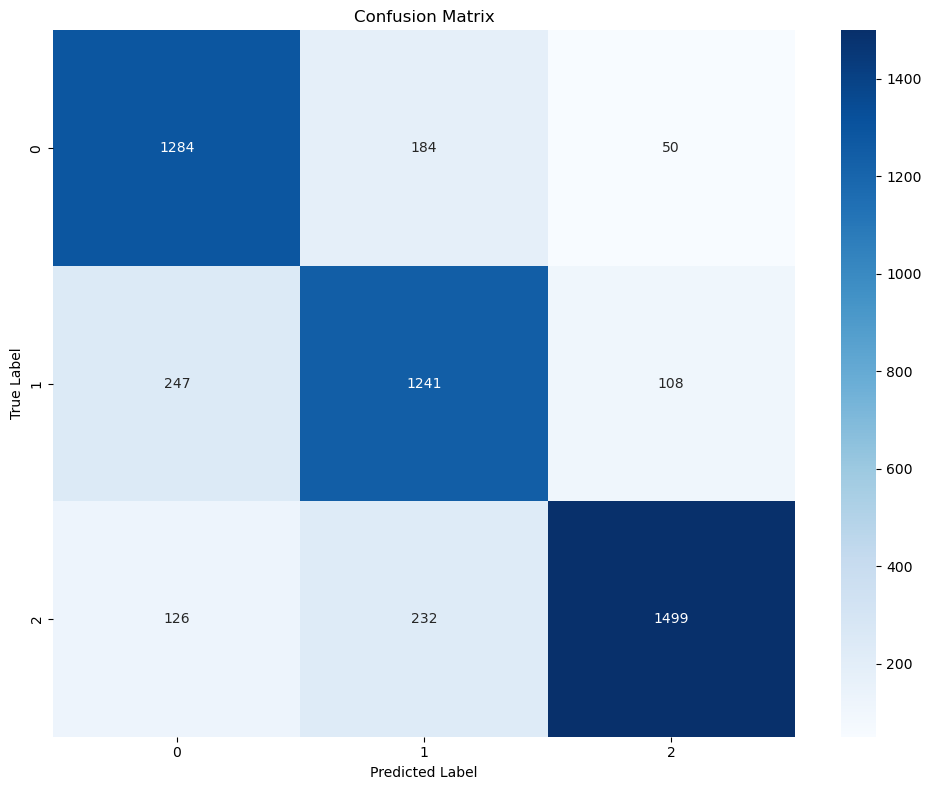

In [18]:
# Print score
print(f"F1 score: {f1_score(y_train_encoded, y_train_pred5, average='micro')}")

# --- Better understand the errors --- #
cm = confusion_matrix(y_train_pred5, y_train_encoded)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

Best 'Dropout' weight: 2.5
Best 'Enrolled' weight: 2.0
Best 'Graduate' weight: 0.5
Best F1 score: 0.8133


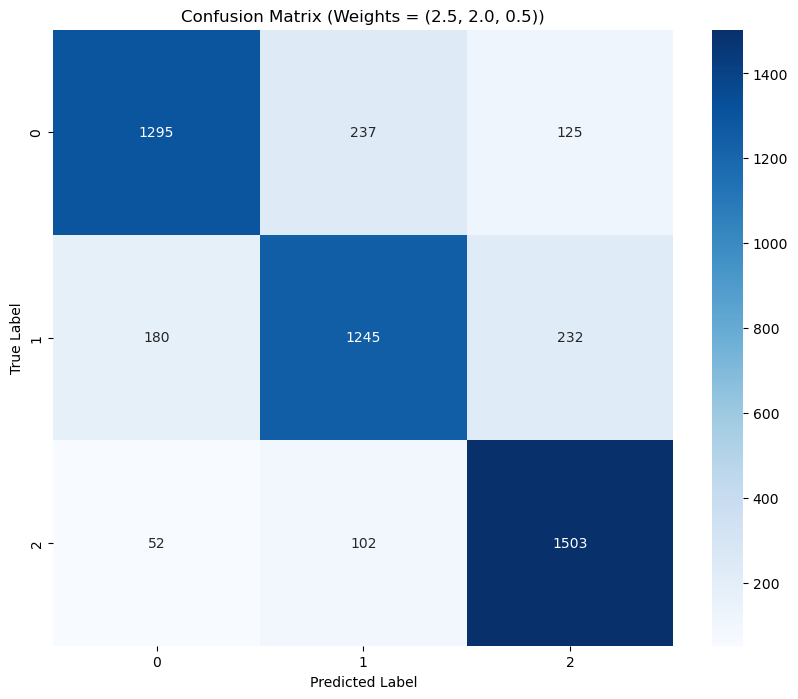

In [19]:
### --- Custom class_weights --- ###
# Get the best regularization parameter
best_c = np.mean([classifier.C_[0] for classifier in ovr5.estimators_])

# Define the weights to try for each class
class0_weights = [0.5, 1.0, 1.5, 2.0, 2.5]
class1_weights = [0.5, 1.0, 1.5, 2.0, 2.5]
class2_weights = [0.5, 1.0, 1.5, 2.0, 2.5]
results = []

# Loop through different weight combinations
for w0 in class0_weights:
    for w1 in class1_weights:
        for w2 in class2_weights:
            # Create class weight dictionary
            class_weights = {0: w0, 
                           1: w1, 
                           2: w2}
            
            # Create and train model with specific C value
            lr = LogisticRegression(
                penalty='l1',
                solver='liblinear',
                C=best_c,
                class_weight=class_weights,
                random_state=27,
            )
            
            model = OneVsRestClassifier(lr, n_jobs=-1).fit(X_train_encoded, 
                                                           y_train_encoded)
            
            # Make predictions
            y_train_pred6 = model.predict(X_train_encoded)
            
            # Calculate metrics
            train_f1 = f1_score(y_train_encoded, y_train_pred6, average='micro')
            
            # Create confusion matrix
            cm = confusion_matrix(y_train_encoded, y_train_pred6)
            
            # Store results
            results.append({
                'weights': (w0, w1, w2),
                'train_f1': train_f1,
                'confusion_matrix': cm
            })

# Find best performing weight combination based on train F1 score
best_result = max(results, key=lambda x: x['train_f1'])


print(f"Best 'Dropout' weight: {best_result['weights'][0]}")
print(f"Best 'Enrolled' weight: {best_result['weights'][1]}")
print(f"Best 'Graduate' weight: {best_result['weights'][2]}")
print(f"Best F1 score: {best_result['train_f1']:.4f}")

# Plot confusion matrix for best result
plt.figure(figsize=(10, 8))
sns.heatmap(best_result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Weights = {best_result["weights"]})')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [20]:
# Fit the best model (using best c and weights)
best_weights = {0: best_result['weights'][0],
                1: best_result['weights'][1], 
                2: best_result['weights'][2]}

lr6 = LogisticRegression(
                penalty='l1',
                solver='liblinear',
                C=best_c,
                class_weight=best_weights,
                random_state=27
            )
            
ovr6 = OneVsRestClassifier(lr6, n_jobs=-1).fit(X_train_encoded, 
                                                y_train_encoded)

# Predict to calculate F1 score for train data
y_train_pred6 = ovr6.predict(X_train_encoded)

In [21]:
# --- Compare all F1 scores simultaneously --- #
print(f"lr1 F1 Score: {f1_score(y_train_encoded, y_train_pred1, average='micro')}") 
print(f"lr2 F1 Score: {f1_score(y_train_encoded, y_train_pred2, average='micro')}") 
print(f"lr3 F1 Score: {f1_score(y_train_encoded, y_train_pred3, average='micro')}") 
print(f"lr4 F1 Score: {f1_score(y_train_encoded, y_train_pred4, average='micro')}")
print(f"lr5 F1 Score: {f1_score(y_train_encoded, y_train_pred5, average='micro')}") 
print(f"lr6 F1 Score: {f1_score(y_train_encoded, y_train_pred6, average='micro')}") 

lr1 F1 Score: 0.8107020720177027
lr2 F1 Score: 0.8123114061557031
lr3 F1 Score: 0.8125125729229531
lr4 F1 Score: 0.8096962381814524
lr5 F1 Score: 0.8094950714142024
lr6 F1 Score: 0.8133172399919534


In [22]:
# Predict the y_test values; I know, I could've used a for loop, but this is ok
y_test_pred1 = ovr1.predict(X_test_encoded)
y_test_pred2 = ovr2.predict(X_test_encoded)
y_test_pred3 = ovr3.predict(X_test_encoded)
y_test_pred4 = ovr4.predict(X_test_encoded)
y_test_pred5 = ovr5.predict(X_test_encoded)
y_test_pred6 = ovr6.predict(X_test_encoded)

# Inverse the LabelEncoder transformation
y_test_pred1 = le.inverse_transform(y_test_pred1)
y_test_pred2 = le.inverse_transform(y_test_pred2)
y_test_pred3 = le.inverse_transform(y_test_pred3)
y_test_pred4 = le.inverse_transform(y_test_pred4)
y_test_pred5 = le.inverse_transform(y_test_pred5)
y_test_pred6 = le.inverse_transform(y_test_pred6)

# Create submission DataFrame
submission1 = pd.DataFrame({
    'ID': X_test.index, 
    'LogReg_Predicted': y_test_pred6
})
display(submission1) # Quick view of the dataset
submission1.to_csv('./submissions/submission_logreg.csv', index=False)

ID LogReg_Predicted
0        0         Graduate
1        1         Enrolled
2        2         Graduate
3        3         Graduate
4        4         Enrolled
...    ...              ...
1101  1101         Graduate
1102  1102         Graduate
1103  1103         Graduate
1104  1104          Dropout
1105  1105          Dropout

[1106 rows x 2 columns]

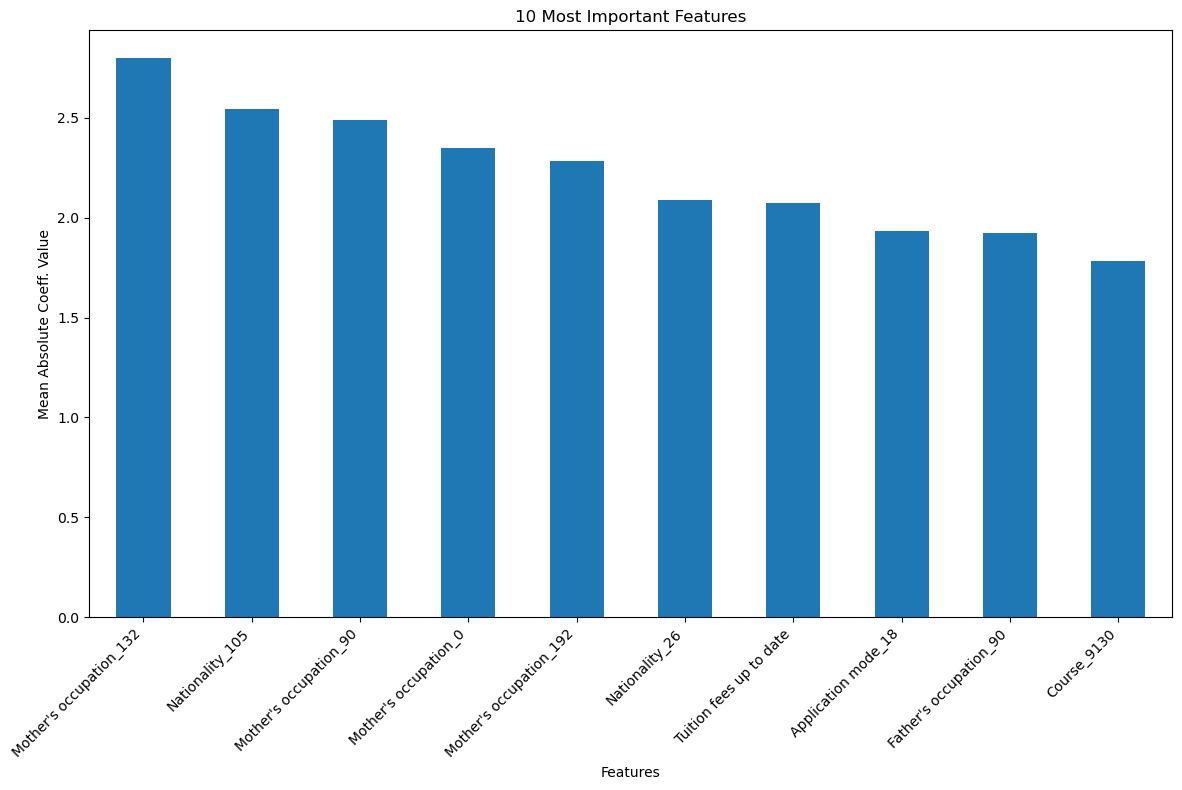

Dropout  Enrolled  Graduate  Non-zero Coefficients
Mother's occupation_132    0.000     4.066    -4.325                      2
Nationality_105            0.000     3.884    -3.742                      2
Mother's occupation_90     1.512    -4.145     1.804                      3
Mother's occupation_0      1.763    -4.566     0.709                      3
Mother's occupation_192   -1.412     2.323    -3.120                      3
Nationality_26            -1.246    -1.371     3.647                      3
Tuition fees up to date   -2.228     1.536     2.451                      3
Application mode_18        0.843    -1.932     3.019                      3
Father's occupation_90     2.024    -3.748     0.000                      2
Course_9130                2.010    -2.068     1.271                      3

In [23]:
# Get feature coeffs for each class
coeffs = [estimator.coef_[0] for estimator in ovr6.estimators_]
features = X_train_encoded.columns
coef_df = pd.DataFrame(coeffs, # DataFrame is easy to work with
                      columns=features,
                      index=['Dropout', 'Enrolled', 'Graduate'])

# Calculate absolute mean importance across classes
mean_importance = np.abs(coef_df).mean()
top_features = mean_importance.sort_values(ascending=False)

# Get 10 most important features
plt.figure(figsize=(12, 8))
top_features.head(10).plot(kind='bar')
plt.title('10 Most Important Features')
plt.xlabel('Features')
plt.ylabel('Mean Absolute Coeff. Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze and intepret coefficients
feature_importance_df = pd.DataFrame({
    'Dropout': coef_df.loc['Dropout'],
    'Enrolled': coef_df.loc['Enrolled'],
    'Graduate': coef_df.loc['Graduate'],
    'Non-zero Coefficients': (coef_df != 0).sum()
}).round(3).reindex(mean_importance.sort_values(ascending=False).index)

display(feature_importance_df[:10])

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

Let's start from the top.

1. The decision to use `SMOTE` instead of `class_weight` was based on two key factors: increased data reliability and improved train F1 scores.

2. `LabelEncoder()` implementation follows standard practice for OvR LogisticRegression.

3. The decision to retain all predictors was justified by LASSO regularization's ability to eliminate redundant features. This proved valuable, as `Nationality` emerged as a significant predictor. Initially, I thought I could figure out which predictors would not be valuable, which was a mistake I had to later fix.

4. `OneHotEncoder` was applied to categorical variables.

5. When addressing the column mismatch between `X_train` and `X_test` after `pd.get_dummies`, the intersection of columns was maintained to ensure reliable predictions based on available data.

6. `PolynomialFeatures` was omitted to prevent feature explosion, though I did consider including the interaction terms.

7. `StandardScaler` was implemented to normalize quantitative features of varying magnitudes (i.e, `Admission grade` and `Inflation rate`).

8. Multiple models were developed to evaluate how additional complexity affected prediction accuracy, evolving from a basic model to the comprehensive `ovr6`.

9. The choice of 10 folds ensured approximately ~300 data points per fold, providing robust validation.

10. `KFold` was implemented for experimentation. `StratifiedKFold` proved unnecessary due to balanced target classes.

11. Testing `class_weight='balanced'` yielded the second lowest F1 score among attempted approaches.

12. LASSO regularization was implemented with 25 `Cs` values (versus 100 in lab examples) using `np.logspace(-3,3,25)` to optimize computation time.

13. Class weights were varied from 0.5 to 2.5 in 0.5 increments, balancing granularity with computational efficiency.

14. Confusion matrices provided detailed insight into model performance, particularly regarding false and true positives.

15. The final Kaggle submission used the most recent model iteration. Future improvements could explore broader ranges of class weights and regularization parameters, balanced against computational constraints.

For coefficient interpretation:
$$ \ln \left( \frac{P(Y_i=1)}{P(Y_i=0)} \right) = \vec{\beta_i}\mathbf{X} $$
where $$i \in \{0,1,2\}$$ corresponds to Dropout, Enrolled, and Graduate respectively.

Key findings from the feature importance analysis:
- Russian nationality (`Nationality_105`) increases enrollment odds while decreasing graduation probability
- Maternal occupation emerged as a significant predictor, with certain professions showing notable negative correlations with student success
- The top two predictors significantly impact both enrollment and graduation probabilities

The feature importance table shows precise coefficient values and their impacts across all three outcomes, highlighting the complex relationships between predictors and student academic outcomes.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [24]:
grader.check("logreg")

logreg results: All test cases passed!

## Model 2: Decision Tree Classifier

Develop a Decision Tree Classifier to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a **Decision Tree Classifier** with hyperparameter tuning.
   - Justify your modeling decisions, including feature preprocessing, hyperparameter values (e.g., depth, splits), and pruning if applied.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_dt.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_dt.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance of the decision tree model (e.g., Gini importance).
   - Visualize and explain which features had the most impact.

**Kaggle Competition Link**: [Decision Tree Kaggle Competition](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)  
**Kaggle Rules Summary**:
- You **must use a Decision Tree Classifier**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

Validation Report
              precision    recall  f1-score   support

     Dropout       0.89      0.70      0.78      1066
    Enrolled       0.45      0.65      0.53       595
    Graduate       0.84      0.82      0.83      1657

    accuracy                           0.75      3318
   macro avg       0.73      0.72      0.72      3318
weighted avg       0.79      0.75      0.76      3318



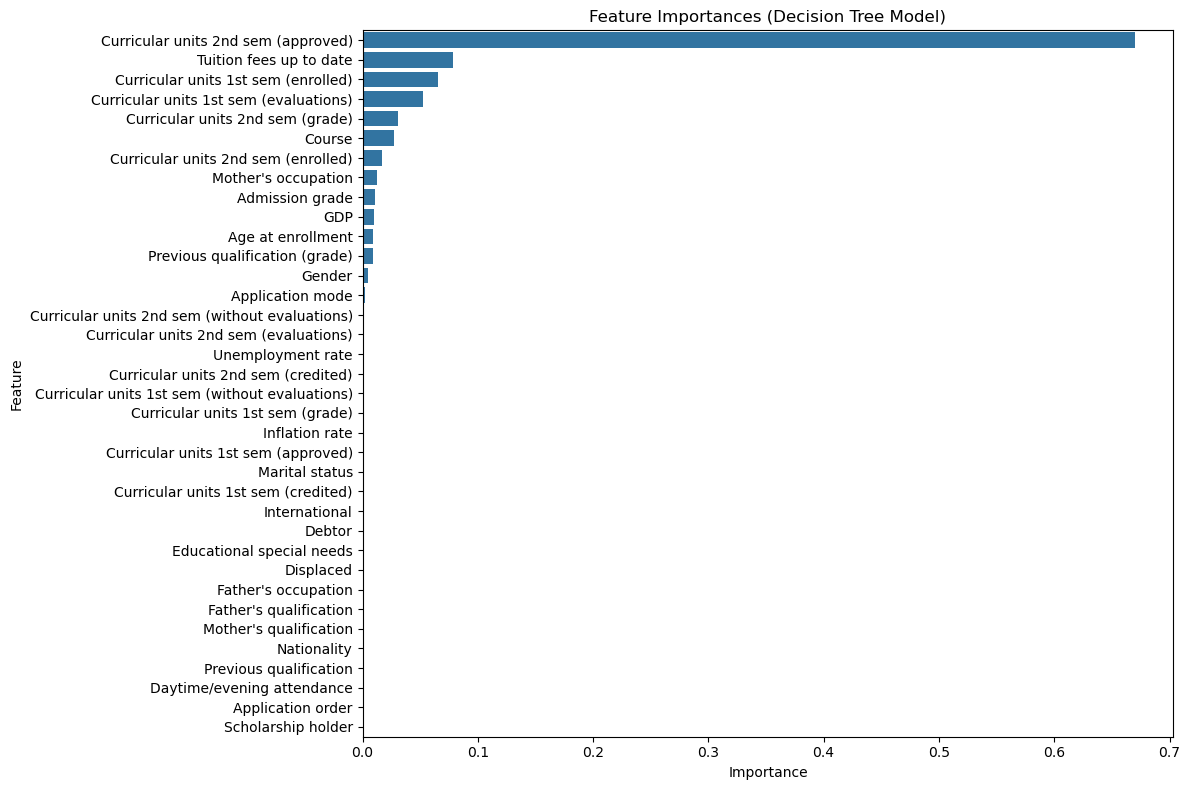

In [25]:
# Start from scratch; load the data (will be used for this model and rf below)
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')

# Define best class weights from grid search
class_weights = {'Graduate': 1.5, 'Dropout': 1.0, 'Enrolled': 2.0}

# Initialize and train the model with class weights and best params from grid search
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=5,
    class_weight=class_weights,
    random_state=42
)
dt_model.fit(X_train, y_train)

# Evaluate model on val
y_train_pred = dt_model.predict(X_train)
print("Validation Report")
print(classification_report(y_train, y_train_pred))

# Generate preds for test data
y_test_pred = dt_model.predict(X_test)

# Create submission
submission = pd.DataFrame({'ID': X_test.index, 
                           'DT_Predicted': y_test_pred})
submission.to_csv('./submissions/submission_dt.csv', index=False)

# Feature Importance
feature_importances = dt_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 
                              'importance': feature_importances}).sort_values(by='importance', 
                                                                              ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('Feature Importances (Decision Tree Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Model Training and Finetuning

To train and fine-tune my Decision Tree Classifier, I started by splitting my training data into an 80-20 train-val split. With my data prepped, I tested a baseline model to get a sense of how the classifier performed without any tuning. Then, I used grid search with 5-fold cross-validation to optimize key parameters like `criterion`, `min_samples_leaf`, `min_samples_split`, and `max_depth`. These parameters control how the tree grows and splits, so fine-tuning them helped find a good balance between underfitting and overfitting. I noticed that the `Enrolled` target class had particularly low performance metrics when compared to the metrics for the `Dropout` and `Graduate` classes. This discrepancy signalled to me that my model may not be robust enough. As such, I introduced bootstrapping, a technique that involves training the model on multiple resampled datasets, to make the model better at generalizing to data given that it was performing well only on 2 out of the 3 target classes. While my bootstrapping implementation led to performance improvements for the `Enrolled` class in accuracy, precision and f1-score, it still notably was lagging behind the model's performance for the other classes. This finally led me to adjusting the class weights to give more importance to the underperforming `Enrolled` class. To find the best class weights, I used grid search with 5-fold cross-validation again. After this, the newly trained model with class weights had greatly improved performance metrics for the `Enrolled` class while not notably diminishing the performance metrics of the other classes, leading to an overall model performance boost. I would then fit all of the data, once I established my optimal hyper parameters, to flesh out the model.

As each of these steps built on the last, they together resulted in the best accuracy and overall performance for the model, with a better balance across all 3 classes.

## Feature Importance
The top 5 most important features for my model in descending order were `Curricular units 2nd sem (approved)`, `Tuition fees up to date`, `Curricular units 1st sem (enrolled)`, `Curricular units 1st sem (evaluations)` and `Curricular units 2nd sem (enrolled)` with `Curricular units 2nd sem (approved)` being approximately 6 times more important than any other feature in the data. Notably only 33% (12/36) features have a feature importance of more >= 0.01, potentially leading to overfitting, increased complexity and noisiness.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [26]:
grader.check("dt")

dt results: All test cases passed!

## Model 3: Custom Model

Develop a custom model of your choice using any methods covered in class up through Lecture 20 (so not boosting, neural networks, etc.). You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a custom model of your choice, using any techniques and methods up to and including Lecture 20.
   - Provide a detailed explanation of your modeling choices, including preprocessing, hyperparameter tuning, and rationale for model selection.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_custom.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_custom.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret feature importance where possible for your selected model.
   - Provide visualizations and explanations to support your interpretations.

**Kaggle Competition Link**: [Custom Model Kaggle Competition](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)  
**Kaggle Rules Summary**:
- The model must use only methods covered in class up to and including Lecture 20 (**no boosting, no neural networks, etc.**).
- Submissions will be **disqualified** if lacking sufficient description of the approach taken or if performance cannot be reproduced in your notebook.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).

---

/Users/main/micromamba/envs/cs109a/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation Report
              precision    recall  f1-score   support

     Dropout       1.00      0.97      0.98      1066
    Enrolled       1.00      0.99      1.00       595
    Graduate       0.98      1.00      0.99      1657

    accuracy                           0.99      3318
   macro avg       0.99      0.99      0.99      3318
weighted avg       0.99      0.99      0.99      3318



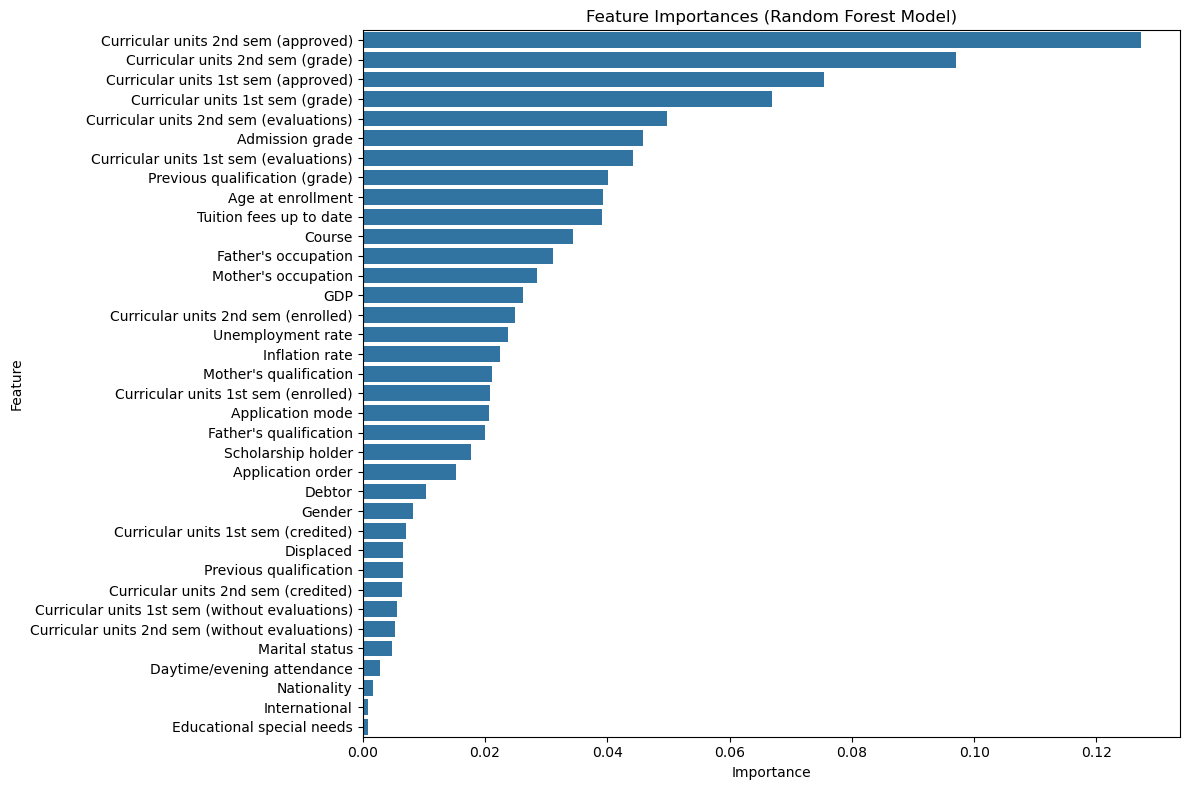

In [27]:
from sklearn.ensemble import RandomForestClassifier
# --- Use RandomForestClassifier; code very similar to the above --- #

# Define best class weights from grid search
class_weights = {'Graduate': 1.0, 'Dropout': 1.0, 'Enrolled': 3}

# Initialize and train the model with class weights and best params from grid search
rf_model= RandomForestClassifier(
    criterion='gini', max_depth=27, min_samples_leaf=1, min_samples_split=5, n_estimators=300,
    class_weight=class_weights, random_state=42
)
rf_model.fit(X_train, y_train)

# Evaluate model on val
y_train_pred = rf_model.predict(X_train)
print("Validation Report")
print(classification_report(y_train, y_train_pred))

# Generate preds for test data
y_test_pred = rf_model.predict(X_test)

# Create submission
submission = pd.DataFrame({'ID': X_test.index, 
                           'Custom_Predicted': y_test_pred})
submission.to_csv('./submissions/submission_custom.csv', index=False)

# Feature Importance
feature_importances = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 
                              'importance': feature_importances}).sort_values(by='importance', 
                                                                              ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('Feature Importances (Random Forest Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Model Training and Finetuning

To train and fine-tune my Random Forest model, I applied an approach equivalent to the one I used for my Decision Tree Classifier, recognizing that Random Forests are essentially ensembles of decision trees. As with the Decision Tree, I started with an 80-20 train-val split and tested a baseline model to assess its initial performance. I then used grid search with 5-fold cross-validation to optimize shared hyperparameters such as criterion, min_samples_leaf, min_samples_split, and max_depth, which influence how individual trees in the forest grow and split. However, a key distinction in tuning the Random Forest model was the need to optimize the n_estimators parameter, which determines the number of trees in the ensemble. As before, I again identified performance discrepancies in the Enrolled target class and introduced class weight adjustments via grid search to enhance its performance without significantly impacting the other classes. This process ultimately resulted in a more robust model with balanced performance across all target classes. I would then fit all of the data, once I established my optimal hyper parameters, to flesh out the model.

## Feature Importance
The top 5 most important features for my model in descending order were `Curricular units 2nd sem (approved)`, `Curricular units 2nd sem (grade)`, `Curricular units 1st sem (approved)`, and `Curricular units 1st sem (grade)` and `Curricular units 2nd sem (evaluations)` with `Curricular units 2nd sem (approved)` being approximately 1.2 times more important than any other feature in the data. Notably of the top 5 most important features, it appears that the number of approved curricular units and the student's grade average over the whole year (sem 1 and 2) are the most predictive of the model's accuracy. Moreover, we can also see that for both features the second semester versio of the feature has noticeably higher importance. This could suggest that in the case of a student's grade average for example "finishing strong" and performing better in your 2nd semester allows the model to better predict a student's outcomes.


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [28]:
grader.check("custom")

custom results: All test cases passed!

## Model Comparison & Kaggle Submission
- **Compare** all three models based on metrics such as F1 score, accuracy, and interpretability. There are many possible metrics for comparison. Consider those you judge to be particularly relevant for potential use cases of your classifier. 
- **Discuss** the strengths and weaknesses of each approach.
- Submit your **best predictions** for each model to the 3 Kaggle competitions.
    - [OvR Logistic Regression](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)
    - [Decision Tree Classifier](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)
    - [Custom Model](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)

---

In [29]:
# --- Compare the 3 models --- #
def compare_models(model, X, y): # Automate this process
    y_pred = model.predict(X)
    metrics = {
        'f1_score': f1_score(y, y_pred, average='micro'),
        'accuracy': accuracy_score(y, y_pred),
    }
    return metrics

models = { # 1 step before making a pretty DataFrame
    'ovr6': compare_models(ovr6, X_train_encoded, y_train_encoded),
    'dt_model': compare_models(dt_model, X_train, y_train),
    'rf_model': compare_models(rf_model, X_train, y_train)
}
models_df = pd.DataFrame.from_dict(models, orient='index')

display(models_df)

f1_score  accuracy
ovr6      0.813317  0.813317
dt_model  0.751959  0.751959
rf_model  0.988547  0.988547

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

Interestingly, a model's F1 score was identical to its accuracy score, which was not intended. From the highest scores to the lowest, we have the Random Forest classifier model (`rf_model`), OvR Logistic Regression model (`ovr6`), and the Decision Tree model (`dt_model`). 

**Random Forest (rf_model)**
- Highest performance with F1 score and accuracy of 0.989
- Strong predictive power but less interpretable than decision trees
- Good at handling complex relationships and reducing overfitting (with bagging)
- Main weakness: Acts as a "black box" - harder to explain individual predictions

**Logistic Regression (ovr6)**
- Moderate performance with F1 score and accuracy of 0.813
- Highly interpretable through coefficient analysis
- Pretty good performance with Confusion Matrix
- Weakness: Computationally very heavy (with tuning hyper parameters)

**Decision Tree (dt_model)**
- Lowest performance with F1 score and accuracy of 0.752
- Most interpretable model - can visualize decision rules
- Simple to explain
- Weakness: Tends to overfit and has lower predictive accuracy

## Use Case Recommendations

1. For maximum prediction accuracy: Use Random Forest
2. For model explanation to stakeholders: Use Decision Tree
3. For balance of interpretability and performance: Use Logistic Regression

The choice between these models would depend on the specific requirements of the student dropout prediction system - whether transparency or accuracy is more important for the institution implementing it.


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Bonus: Causal Inference
- (Optional) Perform a causal inference analysis on a feature of your choice using one of the trained models.
- Use a technique discussed in class, such as **propensity score matching**.

---

In [30]:
# your code here
...

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Wrap-up and Reflection
- Provide insights on how these models could be used by educational institutions to improve student outcomes.
- Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.
- How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

---

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [31]:
hours_spent_on_hw = 15

In [32]:
grader.check("wrapup")

wrapup results: All test cases passed!

In [33]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 4.51 minutes for this notebook to run


🌈 **This concludes HW5. Thank you!**
